In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlresearch.utils import set_matplotlib_style
from algorec.recourse import NFeatureRecourse
from algorec.populations import BasePopulation
from algorec.environments import BankLoanApplication2

In [3]:

set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 3
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

# TODO: end and stop from updating when population becomes too small

# Generate data and fit regression
continuous = [f"f_{i}" for i in range(N_CONTINUOUS)]
categorical = [f"cat_{i}" for i in range(N_CAT)]
rng = np.random.default_rng(RNG_SEED)
df = pd.DataFrame(
    rng.random((N_AGENTS, N_CONTINUOUS)),
    columns=[f"f_{i}" for i in range(N_CONTINUOUS)],
)

for i in range(N_CAT):
    df[f"cat_{i}"] = rng.integers(0, 2, N_AGENTS)

y = rng.integers(0, 2, N_AGENTS)
lr = LogisticRegression().fit(df, y)

In [4]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication2(
    population,
    recourse,
    n_loans=N_LOANS,
    adaptation=ADAPTATION,
    new_agents=NEW_AGENTS,
    random_state=RNG_SEED,
)

environment.run_simulation(9)

In [5]:
environment.population_.data

,f_0,f_1,f_2
6,0.827631,0.358447,0.281705
7,0.354526,0.374107,-0.147097
8,0.778383,-0.018554,0.094998
10,0.744762,0.623248,-0.274431
12,0.129922,0.285285,-0.105108
...,...,...,...
340,0.743995,0.531613,0.476134
341,0.449532,0.640439,0.201535
342,0.888059,0.811752,0.349564
343,0.578609,0.141027,0.972346


(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Population scores over 10 time steps'}, xlabel='Step', ylabel='Score'>)

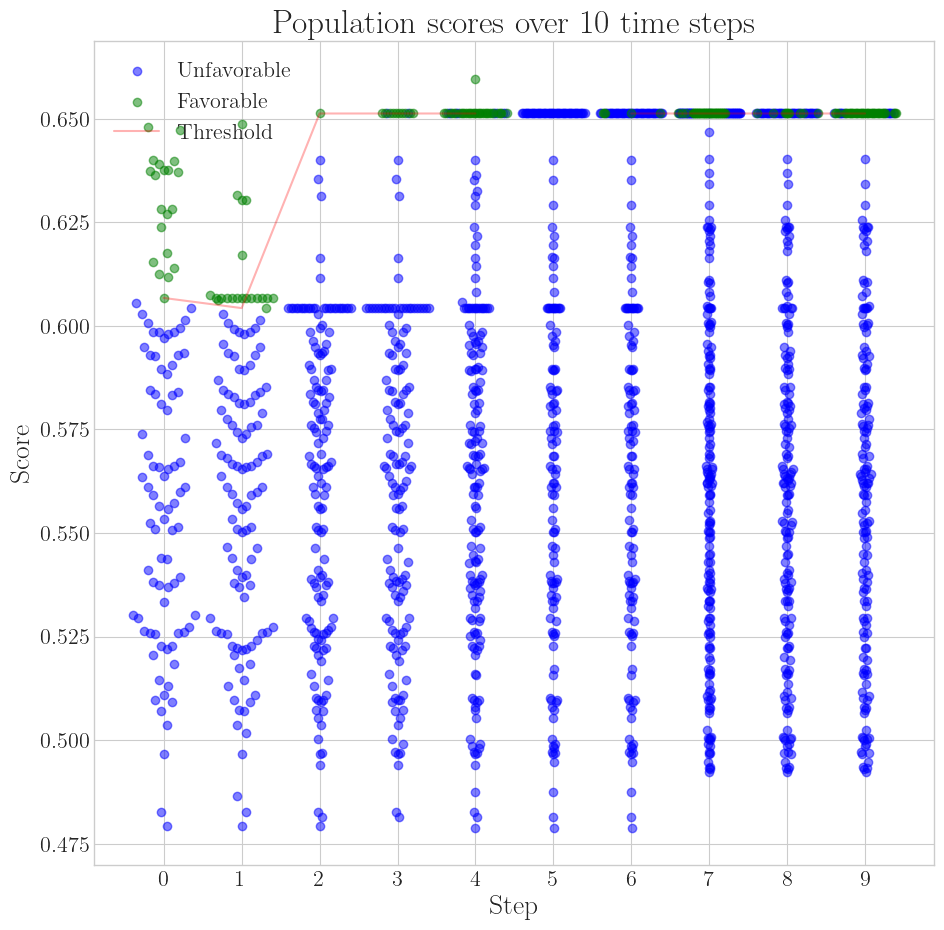

In [6]:
environment.plot.agent_scores()

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Population at t=9'}, xlabel='Component 1', ylabel='Component 2'>)

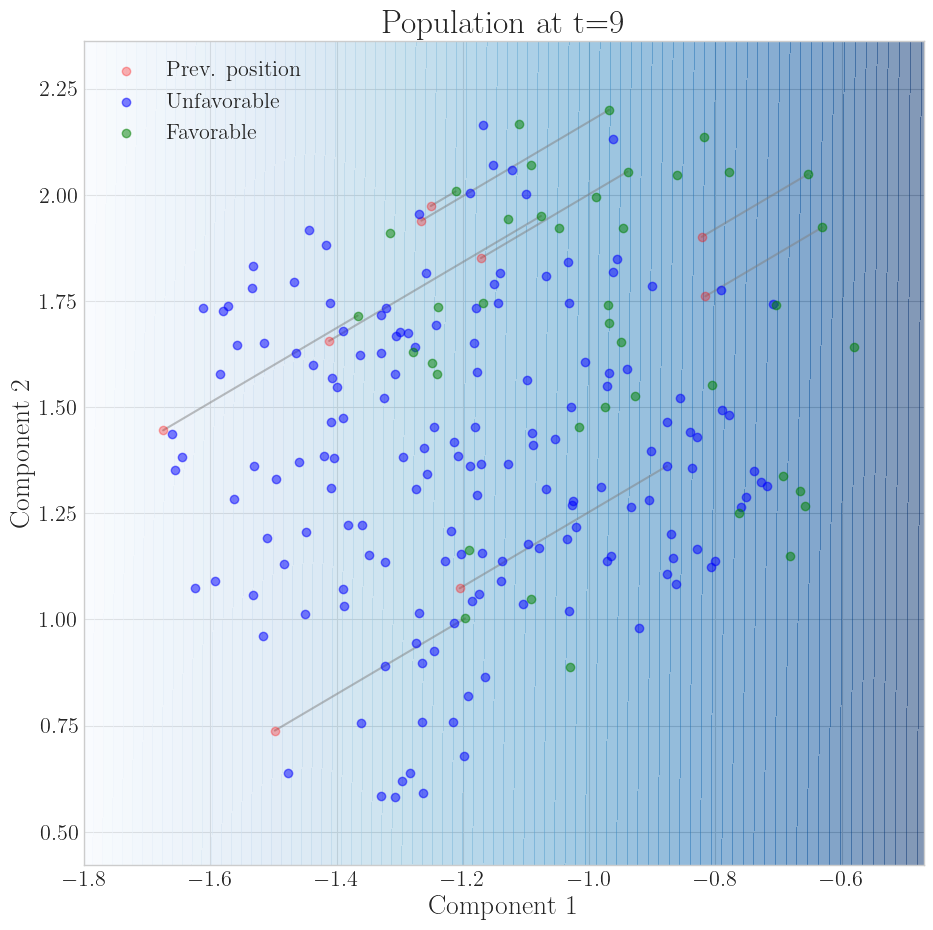

In [7]:
environment.plot.scatter(9)

<Axes: ylabel='Density'>

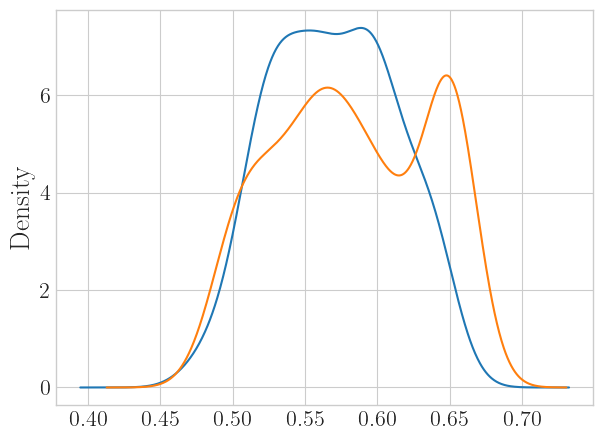

In [8]:
environment.plot.scores_kde(0)
environment.plot.scores_kde(9)

<Axes: title={'center': 'Population size over 10 time steps'}, xlabel='Step', ylabel='Number of agents'>

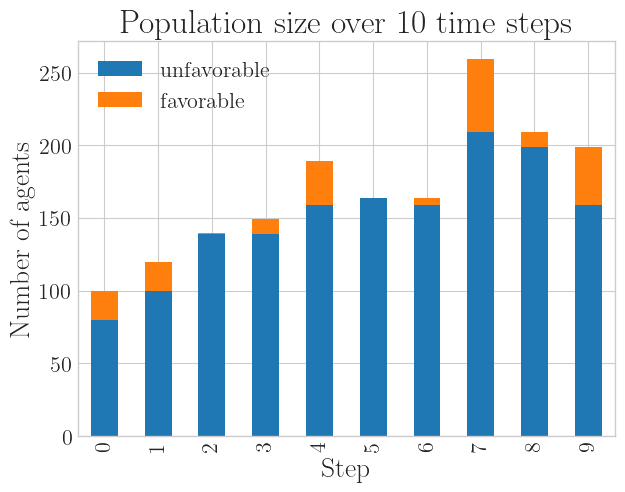

In [9]:
environment.plot.population_size()

In [11]:
environment.success_rate(1, 10)

array([1.        , 0.        , 0.83333333, 0.77142857, 0.        ,
              nan, 0.55555556, 0.2       , 0.88888889])

In [12]:
environment.threshold_drift(1,10)

array([-0.00403611,  0.07773425,  0.        ,  0.        ,         nan,
               nan,  0.        ,  0.        ,  0.        ])